<a href="https://colab.research.google.com/github/shriyashrestha525/ConvolutionNeuralNetwork/blob/main/brain_tumor_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ML/brain_tumor_dataset'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2

In [ ]:
classes = ['No', 'Yes']
target_directory = '/content/drive/MyDrive/ML/brain_tumor_dataset'
for subdir in classes:
    os.makedirs(os.path.join(target_directory, subdir), exist_ok=True)

In [ ]:
x = []
y = []

for class_dir in classes:
  class_label = class_dir
  class_path = os.path.join(target_directory, class_dir)

  for filename in os.listdir(class_path):
    img_path = os.path.join(class_path, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = img/255.0
    x.append(img)

    if class_label == 'yes':
      y.append(1)
    else:
      y.append(0)

x = np.array(x)
y = np.array(y)




In [ ]:
x.shape

(253, 128, 128)

In [ ]:
y.shape

(253,)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y[5]

0

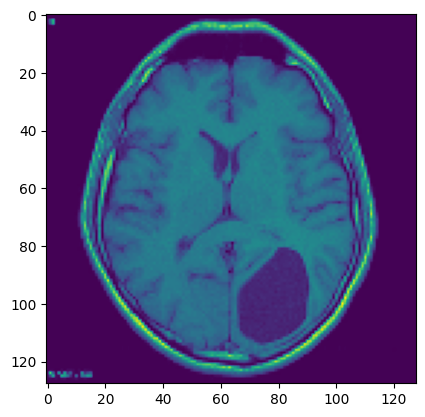

In [ ]:
plt.imshow(x[5])

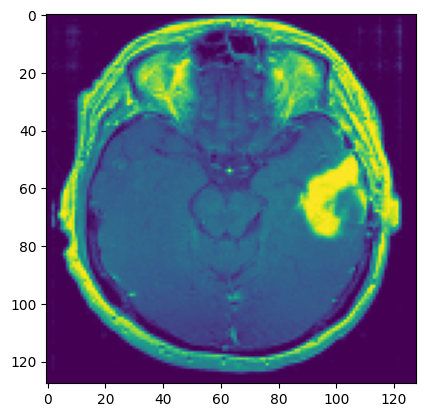

In [ ]:
plt.imshow(x[200])

In [ ]:
def show_image(X, Y, index):
  plt.imshow(X[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


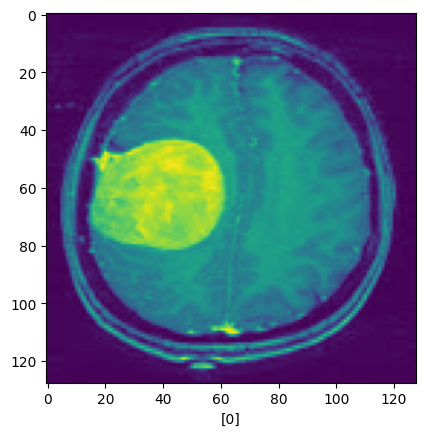

In [ ]:
show_image(x, y, 202)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
cnn = models.Sequential([
    #covolution layer
    layers.Conv2D(filters = 20, kernel_size = (3,3), activation = 'relu', input_shape = (128, 128, 1)),

    #max pooling layer
    layers.MaxPooling2D((2, 2)),

    #dense layer
    layers.Flatten(),
    layers.Dense(units = 40, activation = 'relu'),
    layers.Dense(units = 2, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
            )

In [ ]:
cnn.fit(x_train, y_train, epochs = 5)

Epoch 1/5
7/7 [==============================] - 4s 418ms/step - loss: 0.1307 - accuracy: 0.8416
Epoch 2/5
7/7 [==============================] - 3s 398ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 2s 275ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 2s 321ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 3s 425ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [ ]:
cnn.evaluate(x_test, y_test)

2/2 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
y_pred = cnn.predict(x_test)

2/2 [==============================] - 0s 66ms/step


In [ ]:
y_pred[:5]

array([[9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 2.7466221e-38]], dtype=float32)

In [ ]:
y_predicted = [np.argmax(element) for element in y_pred]

In [ ]:
y_predicted[:5]

[0, 0, 0, 0, 0]

In [ ]:
acc = accuracy_score(y_test, y_predicted)

In [ ]:
acc

1.0